In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd

### Load datasets

In [2]:
df_TOCC=pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### 분석대상
- 궁금한 점 : 한 건의 거래 내역당 총합에 영향을 준 내용은 무엇인가?
- 목표 변수 : amount 
- 설명 변수 : channel, datetime, product, age

In [3]:
df_TOCC.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

### EDA 전략
1. 이상치와 결측치 처리
2. 변수간의 상관성 확인
    - 목표 변수 정규화 여부 판단
    - 각 목표 변수와 각 설명 변수 간의 관계 확인
3. 보고서
    - 변수간 상관성 확인용
    

#### <span style="font-size:18px"> __이상치와 결측치 처리__ </span>

In [4]:
choosed_df_TOCC=df_TOCC[['channel', 'datetime', 'product', 'age','amount']]
choosed_df_TOCC[:2]

,channel,datetime,product,age,amount
0,서비스 방문,2019-10-20,K1,43.0,96900
1,서비스 방문,2019-10-20,K1,62.0,102900


In [5]:
choosed_df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   channel   51304 non-null  object 
 1   datetime  51304 non-null  object 
 2   product   51303 non-null  object 
 3   age       40509 non-null  float64
 4   amount    51304 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
choosed_df_TOCC.isnull().sum()

channel         0
datetime        0
product         1
age         10795
amount          0
dtype: int64

In [7]:
drd_df_TOCC=choosed_df_TOCC.dropna()
drd_df_TOCC.isnull().sum()

channel     0
datetime    0
product     0
age         0
amount      0
dtype: int64

#### <span style="font-size:18px"> __범주형과 연속형(순서형) 으로 Dtype 변형__ </span>

In [8]:
drd_df_TOCC.dtypes

channel      object
datetime     object
product      object
age         float64
amount        int64
dtype: object

In [9]:
drd_df_TOCC['datetime']=pd.to_datetime(drd_df_TOCC['datetime'])
drd_df_TOCC.dtypes

C:\Users\01-03\AppData\Local\Temp\ipykernel_7900\2476333467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drd_df_TOCC['datetime']=pd.to_datetime(drd_df_TOCC['datetime'])


channel             object
datetime    datetime64[ns]
product             object
age                float64
amount               int64
dtype: object

In [10]:
drd_df_TOCC.describe(include='all')

C:\Users\01-03\AppData\Local\Temp\ipykernel_7900\3983802977.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  drd_df_TOCC.describe(include='all')


,channel,datetime,product,age,amount
count,40508,40508,40508,40508.000000,40508.000000
unique,18,101,6,NaN,NaN
top,서비스 방문,2019-10-25 00:00:00,K1,NaN,NaN
freq,12535,702,30138,NaN,NaN
first,NaN,2019-10-20 00:00:00,NaN,NaN,NaN
last,NaN,2020-02-03 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,46.608250,94919.338871
std,NaN,NaN,NaN,13.466141,12618.147953
min,NaN,NaN,NaN,20.000000,55200.000000
25%,NaN,NaN,NaN,37.000000,87900.000000


#### <span style="font-size:18px"> __변수간의 상관성 확인__ </span>
    - 목표 변수 정규화 여부 판단
    - 각 목표 변수와 각 설명 변수 간의 관계 확인

<Axes: xlabel='amount', ylabel='Count'>

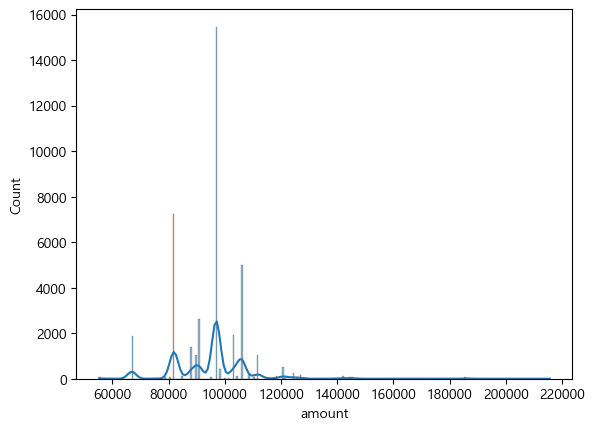

In [11]:
sns.histplot(data=drd_df_TOCC,  x='amount', kde=True) # 정규분포? x => 원래 수치로 판단해야 함

<Axes: xlabel='datetime', ylabel='Count'>

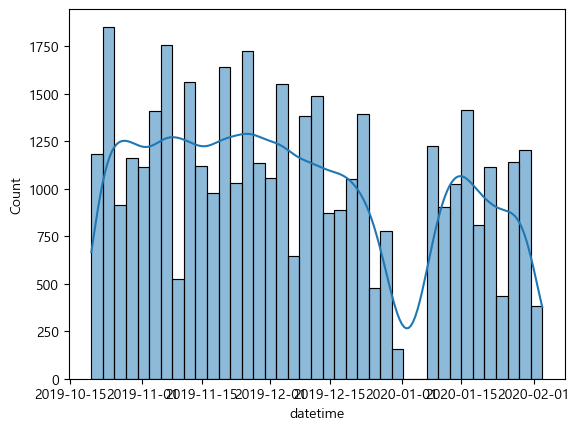

In [12]:
sns.histplot(data=drd_df_TOCC,  x='datetime', kde=True)

In [13]:
# 연속형 / 연속형 : 상관계수 
drd_df_TOCC.corr() # 관계성 있을 경우 pairplot()

C:\Users\01-03\AppData\Local\Temp\ipykernel_7900\1789501296.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  drd_df_TOCC.corr() # 관계성 있을 경우 pairplot()


,age,amount
age,1.000000,-0.003537
amount,-0.003537,1.000000


<Axes: xlabel='product', ylabel='amount'>

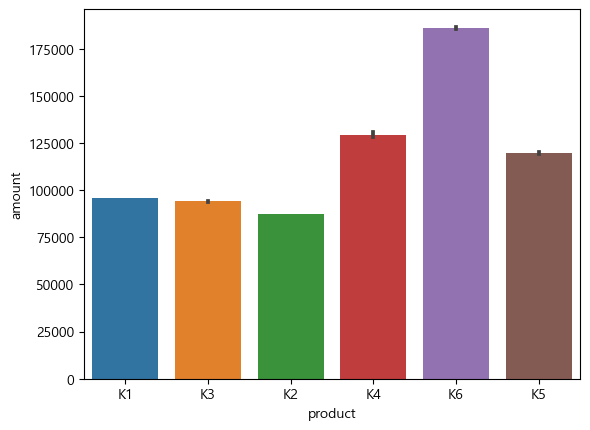

In [14]:
# 범주형 / 연속형 : 최상/최하 개수 선택(항목 중에 영향을 주는 것을 선택)
# 항목 2개 이상 필요
sns.barplot(data=drd_df_TOCC, x= 'product', y='amount')

<Axes: xlabel='channel', ylabel='amount'>

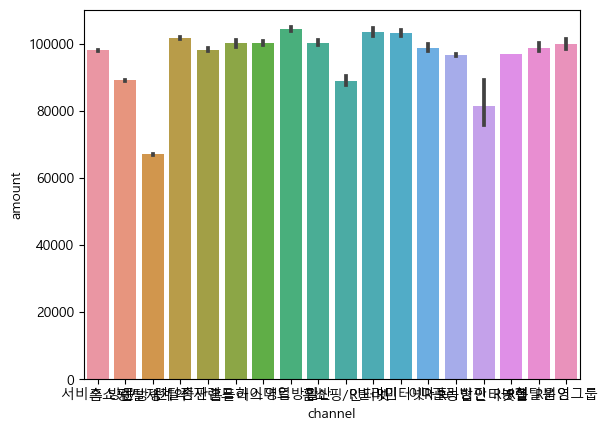

In [15]:
sns.barplot(data=drd_df_TOCC, x= 'channel', y='amount')

In [16]:
drd_df_TOCC['channel'].value_counts()

서비스 방문     12535
홈쇼핑/방송     11862
렌탈총판        4267
R관리방판       3761
영업방판        2143
렌탈재계약       1708
전자랜드        1036
하이마트         974
일반           936
R빌리미         409
이마트          233
홈플러스         202
R인터넷         175
홈쇼핑/인터넷      157
R렌탈운영         95
R농협인터넷몰        7
R농협            6
R법인그룹          2
Name: channel, dtype: int64

In [17]:
### 변수 안에서 원하는 항목 필터링
conditions = (drd_df_TOCC['product'] == 'K4') | (drd_df_TOCC['product'] == 'K5') | (drd_df_TOCC['product'] == 'K6')
ftd_df_TOCC=drd_df_TOCC.loc[conditions]
ftd_df_TOCC[:2]

,channel,datetime,product,age,amount
58,영업방판,2019-10-21,K4,28.0,126900
110,서비스 방문,2019-10-21,K4,23.0,125700


<Axes: xlabel='product', ylabel='amount'>

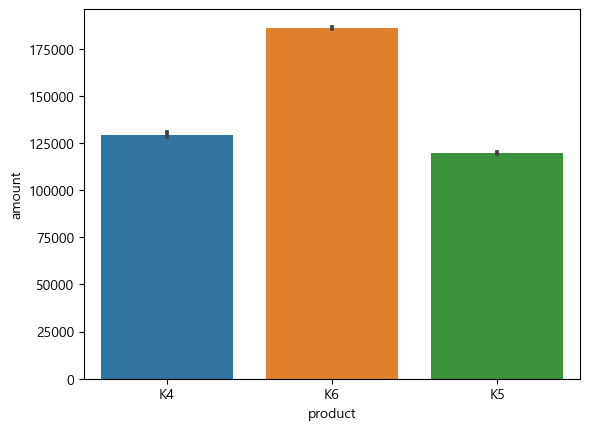

In [18]:
sns.barplot(data=ftd_df_TOCC, x= 'product', y='amount')

<Axes: xlabel='datetime', ylabel='amount'>

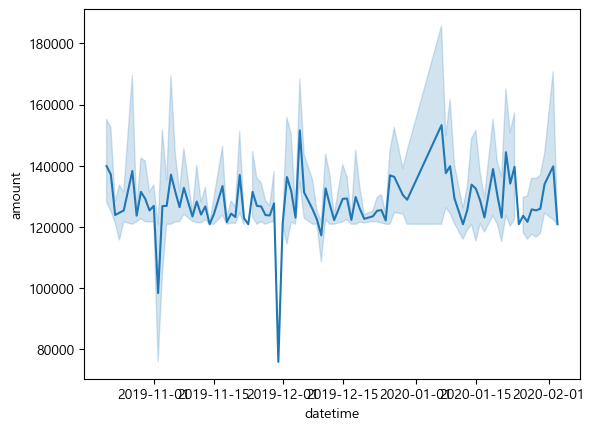

In [19]:
### 순서형 / 연속형
sns.lineplot(data=ftd_df_TOCC, x= 'datetime', y='amount')

In [31]:
ftd_df_TOCC['day_name'] = ftd_df_TOCC['datetime'].dt.day_name()
ftd_df_TOCC['day_name'].value_counts()

C:\Users\01-03\AppData\Local\Temp\ipykernel_7900\207466215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftd_df_TOCC['day_name'] = ftd_df_TOCC['datetime'].dt.day_name()


Thursday     177
Friday       170
Wednesday    157
Tuesday      156
Monday       149
Sunday       136
Saturday       5
Name: day_name, dtype: int64

<Axes: xlabel='day_name', ylabel='amount'>

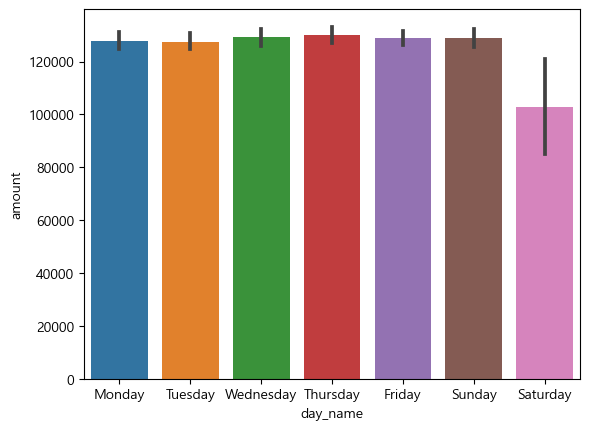

In [32]:
# 범주형/연속형
sns.barplot(data=ftd_df_TOCC, x= 'day_name', y='amount')

#### <span style="font-size:18px"> __보고서__ </span>
변수간 상관성 확인용
- 목표 변수 : 비정규 분포
- 설명 변수
    - type_of_contract(범주형) : 2개 항목
    - channel(범주형)
    - product(범주형) : 상위 3개 항목 
    - age(연속형) : 상관 계수가 -0.003539 < 0.5 작아서 설명 변수 채택 어려움
    - datetime(순서형): 분포 특성상 요일별 변환
    - day_name : 요일별 분석 위한 컬럼 추가